In [1]:
%run ../input/python-recipes/dhtml.py
dhtml('File Writing')

In [2]:
# %%writefile numpy_sage.py
from IPython.core.display import display,HTML
import random,numpy as np

def sage_list_plot(array,labels=None,
                   precision=8,
                   width=650,height=700,
                   kw=.0095,kh=0.0035):
    str_array=np.array2string(
        array,precision=precision,separator=',',
        suppress_small=True)
    if labels==None: 
        labels=[i+1 for i in range(len(array))]
    html_str="""<html><head><meta charset='utf-8'>"""+\
    """<script src='https://sagecell.sagemath.org/"""+\
    """static/embedded_sagecell.js'>"""+\
    """</script><script>$(function() {"""+\
    """sagecell.makeSagecell({inputLocation:'div.plot',"""+\
    """evalButtonText:'run',linked:true}); """+\
    """});</script></head>"""+\
    """<style>#array1.sagecell .CodeMirror-scroll {"""+\
    """min-height:3em; max-height:5em;} """+\
    """.sagecell .CodeMirror-scroll {"""+\
    """min-height:3em; max-height:11em;}</style><body>"""+\
    """<div class='plot' id='array1'><script type='text/x-sage'>"""+\
    """import numpy as np\n"""+\
    """array=np.array("""+str_array+""")\n"""+\
    """labels="""+str(labels)+"""\n"""+\
    """</script></div><br/>"""+\
    """<div class='plot'><script type='text/x-sage'>"""+\
    """print('array dimensions:%s'%str(array.shape))\n"""+\
    """n=array.shape[0]\n"""+\
    """p=sum([list_plot(\n"""+\
    """    array[i],plotjoined=True,\n"""+\
    """    color=hue(i/n),marker='o',markersize=2,\n"""+\
    """    legend_label=labels[i])\n"""+\
    """       for i in range(n)])\n"""+\
    """p.show(figsize=("""+str(
        (np.round(kw*width,2),np.round(kh*height,2)))+\
    """),axes=False,\n"""+\
    """       frame=True,gridlines=True)"""+\
    """</script></div></body></html>"""
    file='sage_coderun'+str(random.uniform(0,9999999))+'.html'
    with open(file,'w') as f:
        f.write(html_str); f.close()
    string="""<div id='html_string1'><iframe src='"""+\
           file+"""' height="""+str(height+20)+\
           """ width="""+str(width+20)+"""></iframe></div>"""
    display(HTML(string))
    
def sage_list_plot_min(array,labels=None,
                       precision=8,
                       width=650,height=450,
                       kw=.0095,kh=.0075):
    str_array=np.array2string(
        array,precision=precision,separator=',',
        suppress_small=True)
    if labels==None: 
        labels=[i+1 for i in range(len(array))]
    html_str="""<html><head><meta charset='utf-8'>"""+\
    """<script src='https://sagecell.sagemath.org/"""+\
    """static/embedded_sagecell.js'>"""+\
    """</script><script>$(function() {"""+\
    """sagecell.makeSagecell({inputLocation:'div.plot_min',"""+\
    """evalButtonText:'run',autoeval:true,"""+\
    """template:sagecell.templates.minimal}); """+\
    """});</script></head><body>"""+\
    """<div class='plot_min'><script type='text/x-sage'>"""+\
    """import numpy as np\n"""+\
    """array=np.array("""+str_array+""")\n"""+\
    """labels="""+str(labels)+"""\n"""+\
    """print('array dimensions:%s'%str(array.shape))\n"""+\
    """n=array.shape[0]\n"""+\
    """p=sum([list_plot(\n"""+\
    """    array[i],plotjoined=True,\n"""+\
    """    color=hue(i/n),marker='o',markersize=2,\n"""+\
    """    legend_label=labels[i])\n"""+\
    """       for i in range(n)])\n"""+\
    """p.show(figsize=("""+str(
        (np.round(kw*width,2),np.round(kh*height,2)))+\
    """),axes=False,\n"""+\
    """       frame=True,gridlines=True)"""+\
    """</script></div></body></html>"""
    file='sage_coderun'+str(random.uniform(0,9999999))+'.html'
    with open(file,'w') as f:
        f.write(html_str); f.close()
    string="""<div id='html_string2'><iframe src='"""+\
           file+"""' height="""+str(height+20)+\
           """ width="""+str(width+20)+"""></iframe></div>"""
    display(HTML(string))

In [3]:
%run numpy_sage.py

In [4]:
dhtml('Example #1')

In [5]:
import bq_helper
open_aq=bq_helper.BigQueryHelper(
    active_project="bigquery-public-data",
    dataset_name="openaq")
open_aq.head("global_air_quality",3).T

Using Kaggle's public dataset BigQuery integration.


,0,1,2
location,"BTM Layout, Bengaluru - KSPCB","BTM Layout, Bengaluru - KSPCB","BTM Layout, Bengaluru - KSPCB"
city,Bengaluru,Bengaluru,Bengaluru
country,IN,IN,IN
pollutant,co,no2,o3
value,910,131.87,15.57
timestamp,2018-02-22 03:00:00+00:00,2018-02-22 03:00:00+00:00,2018-02-22 03:00:00+00:00
unit,µg/m³,µg/m³,µg/m³
source_name,CPCB,CPCB,CPCB
latitude,12.9128,12.9128,12.9128
longitude,77.6092,77.6092,77.6092


In [6]:
my_query="""
SELECT country,pollutant,AVG(value) as avg_value
FROM `bigquery-public-data.openaq.global_air_quality`
WHERE unit='µg/m³' 
GROUP BY country,pollutant
ORDER BY country,pollutant
"""
pollutants=open_aq.query_to_pandas_safe(my_query)
pollutants.head(10).T

,0,1,2,3,4,5,6,7,8,9
country,AD,AD,AD,AD,AD,AE,AF,AR,AR,AT
pollutant,co,no2,o3,pm10,so2,pm25,pm25,pm10,pm25,co
avg_value,100,3,59.3333,4,2,24.3333,24,15.6667,18.1,256.13


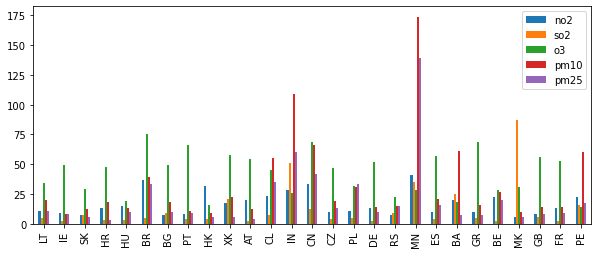

In [7]:
import pandas as pd,pylab as pl
df_pollutants=pd.DataFrame(
    index=list(set(pollutants['country'])), 
    columns=list(set(pollutants['pollutant'])))
df_pollutants=df_pollutants.fillna(0)
for i in range(len(pollutants)):
    index=pollutants.loc[i][0]
    column=pollutants.loc[i][1]
    df_pollutants[column][index]=pollutants.loc[i][2]
data=df_pollutants[
         (df_pollutants['no2']>0)&(df_pollutants['o3']>0)&
         (df_pollutants['so2']>0)&
         (df_pollutants['pm10']>0)&(df_pollutants['pm25']>0)]
data=data[['no2','so2','o3','pm10','pm25']]
data.plot.bar(figsize=(10,4));

In [8]:
array=data.T.values
labels=['no2','so2','o3','pm10','pm25']
sage_list_plot(array,labels)

In [9]:
dhtml('Example #2')

In [10]:
import bq_helper
bitcoin_blockchain=bq_helper.BigQueryHelper(
    active_project="bigquery-public-data",
    dataset_name="bitcoin_blockchain")

Using Kaggle's public dataset BigQuery integration.


In [11]:
my_query2="""
WITH time AS (
SELECT TIMESTAMP_MILLIS(timestamp) 
AS trans_time,transaction_id
FROM `bigquery-public-data.bitcoin_blockchain.transactions`)
SELECT COUNT(transaction_id)/1000000 AS transactions,
EXTRACT(MONTH FROM trans_time) AS month,
EXTRACT(YEAR FROM trans_time) AS year
FROM time
GROUP BY year,month 
ORDER BY year,month
"""

In [12]:
transactions_per_month=\
bitcoin_blockchain.query_to_pandas_safe(
    my_query2,max_gb_scanned=24)
transactions_per_month.tail()

,transactions,month,year
112,6.138957,5,2018
113,5.752514,6,2018
114,6.393536,7,2018
115,6.417764,8,2018
116,2.087279,9,2018


In [13]:
transactions_per_month.shape

(117, 3)

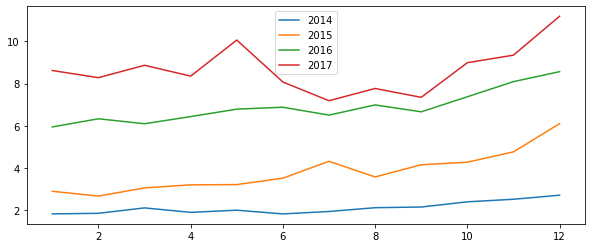

In [14]:
import pandas as pd
transactions_per_month2=pd.DataFrame(
    index=range(1,13,1),columns=range(2014,2018,1))
transactions_per_month2=transactions_per_month2.fillna(0)
for i in range(2014,2018,1):
    transactions_per_month2.loc[:,i]=\
    transactions_per_month[transactions_per_month['year']==i]\
    ["transactions"][:12].values
transactions_per_month2.plot(figsize=(10,4));

In [15]:
data2=transactions_per_month2.T.values
labels2=['2014','2015','2016','2017']
sage_list_plot_min(
    array=data2,labels=labels2,precision=6)